In [10]:
pip install --upgrade langchain langchain-core langchain-community langchain-mistralai pydantic

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.8 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 402.3 kB/s eta 0:00:00 kB/s eta 0:00:01:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 225.3 kB/s eta 0:00:001m216.9 kB/s eta 0:00:02
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.23.4
    Uninstalling pydantic_core-2.23.4:
      Successfully uninstalled pydantic_core-2.23.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.9.2
    Uninstalling pydantic-2.9.2:
      Successfully uninstalled pydantic-2.9.2
  Attempting uninstall: lan

In [29]:
import getpass
import os

os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_API_KEY"] = "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"

In [17]:
from langchain_community.document_loaders import PyPDFLoader

file_path = "Sample HI Policy.pdf"
loader = PyPDFLoader(file_path)

docs = loader.load()

print(len(docs))

68


In [18]:
print(f"{docs[0].page_content[:500]} \n")
print(docs[0].metadata)

Date: 13/01/2025
Policy Number: 33033225202502
Customer ID: 2002528737
MR. LOKU HEMANTH
1-59 NARSIMHA SAGAR MULUGU TELANGANA,
506172,
WARANGAL,
TELANGANA  -506172
Mobile: XXXXXX4777
  
Product Name: ReAssure | Product UIN: NBHHLIP25037V032425Subject :  Niva Bupa Health Insurance Policy No.   33033225202502
Dear MR. LOKU HEMANTH,
Thank you for renewing your Niva Bupa health insurance policy. At Niva Bupa, we put your health first and are committed to provide you access to 
the very best of health 

{'producer': 'PyPDF', 'creator': 'HP Exstream Version 9.0.104 64-bit (DBCS)', 'creationdate': '1/13/2025 06:34:17', 'author': 'Registered to: MAXBUPA', 'title': 'FPPACK_B_PA', 'source': 'Sample HI Policy.pdf', 'total_pages': 68, 'page': 0, 'page_label': '1'}


In [19]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200, add_start_index=True
)
all_splits = text_splitter.split_documents(docs)

len(all_splits)

231

In [20]:
all_splits[5]

Document(metadata={'producer': 'PyPDF', 'creator': 'HP Exstream Version 9.0.104 64-bit (DBCS)', 'creationdate': '1/13/2025 06:34:17', 'author': 'Registered to: MAXBUPA', 'title': 'FPPACK_B_PA', 'source': 'Sample HI Policy.pdf', 'total_pages': 68, 'page': 2, 'page_label': '3', 'start_index': 806}, page_content='Accident opted\nMr. Hemanth  Loku 12,50,000 1,37,750 12,50,000 26,37,750 0.00  0\n.\x01\nPremium Details \nNet\nPremium/Taxable\nValue (Rs.)Integrated\nGoods and\nService Tax\n(18.00%)Central Goods and\nService Tax (0.00\n%)State/UT Goods and\nService Tax (0.00 %)Gross Premium (Rs.) Gross Premium (Rs.)\n(in words)\n10,868.00 1,956.24 0.00 0.00 12,824.00 Twelve Thousand Eight Hundred\nTwenty-Four Only\nNominee Details\nNominee Name Relationship with the Policyholder\nLoku   Satyam Father\nIntermediary Details\n Intermediary Name Intermediary Code Intermediary Contact No.\nBank Of Baroda BNK0060001 02267592513\nClaim Administrator Servicing Branch Details\nNiva Bupa Health Insuranc

In [37]:
pip install -qU "langchain[groq]"

Note: you may need to restart the kernel to use updated packages.


In [38]:
import getpass
import os

if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")

from langchain.chat_models import init_chat_model

llm = init_chat_model("llama3-8b-8192", model_provider="groq")


Enter API key for Groq:  ········


In [43]:
import getpass
import os

if not os.environ.get("MISTRALAI_API_KEY"):
  os.environ["MISTRALAI_API_KEY"] = getpass.getpass("Enter API key for MistralAI: ")

from langchain_mistralai import MistralAIEmbeddings

embeddings = MistralAIEmbeddings(model="mistral-embed")

Enter API key for MistralAI:  ········


/Applications/anaconda3/envs/misenv/lib/python3.12/site-packages/langchain_mistralai/embeddings.py:181: UserWarning: Could not download mistral tokenizer from Huggingface for calculating batch sizes. Set a Huggingface token via the HF_TOKEN environment variable to download the real tokenizer. Falling back to a dummy tokenizer that uses `len()`.
  warnings.warn(


In [45]:
from langchain_mistralai import MistralAIEmbeddings

embeddings = MistralAIEmbeddings(model="mistral-embed",api_key="2vR7N6623ZXQ4xF73HChYcYNL61zh5Qc")

In [22]:
import os
g1=os.environ.get("GROQ_API_KEY")
print(g1)

None


In [46]:
vector_1 = embeddings.embed_query(all_splits[0].page_content)
vector_2 = embeddings.embed_query(all_splits[1].page_content)

assert len(vector_1) == len(vector_2)
print(f"Generated vectors of length {len(vector_1)}\n")
print(vector_1[:10])

Generated vectors of length 1024

[-0.033203125, 0.02532958984375, 0.0572509765625, -0.028045654296875, 0.040252685546875, 0.038848876953125, 0.049224853515625, -0.0128173828125, 0.004352569580078125, 0.0023441314697265625]


In [10]:
pip install -qU langchain-core

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-chroma 0.1.2 requires langchain-core<0.3,>=0.1.40, but you have langchain-core 0.3.40 which is incompatible.
langchain-ollama 0.1.1 requires langchain-core<0.3.0,>=0.2.20, but you have langchain-core 0.3.40 which is incompatible.
langchain-experimental 0.0.64 requires langchain-community<0.3.0,>=0.2.10, but you have langchain-community 0.3.18 which is incompatible.
langchain-experimental 0.0.64 requires langchain-core<0.3.0,>=0.2.27, but you have langchain-core 0.3.40 which is incompatible.
langchain-huggingface 0.0.3 requires langchain-core<0.3,>=0.1.52, but you have langchain-core 0.3.40 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [24]:
from langchain_core.vectorstores import InMemoryVectorStore

vector_store = InMemoryVectorStore(embeddings)

In [25]:
ids = vector_store.add_documents(documents=all_splits)

In [26]:
results = vector_store.similarity_search(
    "Are treatments taken outside India covered?"
)

print(results[0])

page_content='d. The insured person is in India and the treatment is required in India only and not overseas in any condition 
whatsoever.  
e. The air ambulance provider is registered in India.  
f. We will cover expen ses up to the amount specified in the Policy Schedule  for transportation of the Insured 
Person under this benefit.  
 
What is not covered:  
a. Expenses incurred in return transportation to Insured Person’s home by air ambulance is excluded.  
 
4.11 Home Care treatment  
 
What is covered:  
We will indemnify the Medical Expenses incurred on the Insured Person’s treatment taken at home for 
Chemotherapy or Dialysis.  
 
Conditions - The above coverage is subject to fulfilment of following conditions : 
a. These services shall be offered by a registered homecare provider.  
 
What is not covered:  
a. Treatment taken by automation machine for peritoneal dialysis.  
b. Sections 4.6 (Pre-hospitalization Medical Expenses) and Section 4.7 (Post - hospitalization Medical 

In [27]:
results = await vector_store.asimilarity_search("How many days does it take to resolve a grievance?")

print(results[0])

page_content='POLICY SERVICING
CLAIM SERVICING
GRIEVANCE HANDLINGPost Policy issue service requests –from the date of receipt of service 
request7Days
Proposal refund in case of cancellation –from the date of decision of the 
proposal7 Days
Settlement of Claims -From the date of submission of claim 15 Days
Acknowledge a grievance –from the date of receipt of grievance Immediately
Resolve a grievance –from the date of receipt of grievance 14 Days
Turnaround Time*
(Calendar Days)
Turnaround Time*
(Calendar Days)
Turnaround Time*
(Calendar Days)
*Turnaround time will start from the date of receipt of complete documents at Niva Bupa Health Insurance Company Ltd.' metadata={'producer': 'PyPDF', 'creator': 'HP Exstream Version 9.0.104 64-bit (DBCS)', 'creationdate': '1/13/2025 06:34:17', 'author': 'Registered to: MAXBUPA', 'title': 'FPPACK_B_PA', 'source': 'Sample HI Policy.pdf', 'total_pages': 68, 'page': 1, 'page_label': '2', 'start_index': 0}


In [30]:
from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "(context goes here)", "question": "(question goes here)"}
).to_messages()

assert len(example_messages) == 1
print(example_messages[0].content)

/Applications/anaconda3/envs/misenv/lib/python3.12/site-packages/langsmith/client.py:323: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: (question goes here) 
Context: (context goes here) 
Answer:


In [50]:
from langchain_core.prompts import PromptTemplate

template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Use three sentences maximum and keep the answer as concise as possible.
Always say "thanks for asking!" at the end of the answer.

{context}

Question: {question}

Helpful Answer:"""
custom_rag_prompt = PromptTemplate.from_template(template)

In [31]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict


class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

In [51]:
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

def generate1(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = custom_rag_prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

In [53]:
from langgraph.graph import START, StateGraph

# Create the graph
graph_builder = StateGraph(State)
graph_builder1 = StateGraph(State)

# Add your nodes
graph_builder.add_node("retrieve", retrieve)
graph_builder.add_node("generate", generate)
graph_builder1.add_node("retrieve", retrieve)
graph_builder1.add_node("generate1", generate1)

# Add your edges
graph_builder.add_edge(START, "retrieve")
graph_builder.add_edge("retrieve", "generate")
graph_builder1.add_edge(START, "retrieve")
graph_builder1.add_edge("retrieve", "generate1")

# Compile the graph
graph = graph_builder.compile()
graph1 = graph_builder1.compile()

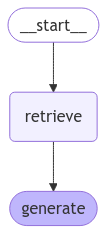

In [56]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

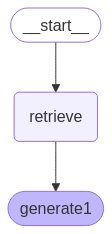

In [57]:
from IPython.display import Image, display

display(Image(graph1.get_graph().draw_mermaid_png()))

In [42]:
result = graph.invoke({"question": "Is there an option for room type modification under this policy?"})

print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Context: [Document(id='72da1707-8d4f-4f0a-bc76-24eb96a55966', metadata={'producer': 'PyPDF', 'creator': 'HP Exstream Version 9.0.104 64-bit (DBCS)', 'creationdate': '1/13/2025 06:34:17', 'author': 'Registered to: MAXBUPA', 'title': 'FPPACK_B_PA', 'source': 'Sample HI Policy.pdf', 'total_pages': 68, 'page': 34, 'page_label': '35', 'start_index': 3010}, page_content='4.14 Shared accommodation Cash Benefit  \n \nWhat is covered:  \nIf We have accepted an Inpatient Care Hospitalization claim and the Insured Person has occupied a shared  room \naccommodation during such Hospitalization in a Network Hospital, We will pay a daily cash amount as specified \nin the Policy Schedule for the Insured Person for each continuous and completed period of 24 hours of \nHospitalization.  \n \nConditions - The abo ve coverage is subject to fulfilment of following conditions : \na. The Insured Person has been admitted in a Hospital for a minimum period of 48 hours continuously.  \n \nWhat is not covered:  

In [58]:
result = graph1.invoke({"question": "Is there an option for room type modification under this policy?"})

print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Context: [Document(id='72da1707-8d4f-4f0a-bc76-24eb96a55966', metadata={'producer': 'PyPDF', 'creator': 'HP Exstream Version 9.0.104 64-bit (DBCS)', 'creationdate': '1/13/2025 06:34:17', 'author': 'Registered to: MAXBUPA', 'title': 'FPPACK_B_PA', 'source': 'Sample HI Policy.pdf', 'total_pages': 68, 'page': 34, 'page_label': '35', 'start_index': 3010}, page_content='4.14 Shared accommodation Cash Benefit  \n \nWhat is covered:  \nIf We have accepted an Inpatient Care Hospitalization claim and the Insured Person has occupied a shared  room \naccommodation during such Hospitalization in a Network Hospital, We will pay a daily cash amount as specified \nin the Policy Schedule for the Insured Person for each continuous and completed period of 24 hours of \nHospitalization.  \n \nConditions - The abo ve coverage is subject to fulfilment of following conditions : \na. The Insured Person has been admitted in a Hospital for a minimum period of 48 hours continuously.  \n \nWhat is not covered:  

In [47]:
result = graph.invoke({"question": "What is the waiting period for pre-existing diseases?"})

print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Context: [Document(id='0796df39-6921-47d0-bcb3-c13c92a8d51c', metadata={'producer': 'PyPDF', 'creator': 'HP Exstream Version 9.0.104 64-bit (DBCS)', 'creationdate': '1/13/2025 06:34:17', 'author': 'Registered to: MAXBUPA', 'title': 'FPPACK_B_PA', 'source': 'Sample HI Policy.pdf', 'total_pages': 68, 'page': 43, 'page_label': '44', 'start_index': 1619}, page_content='d. Coverage under the Policy after the expiry of 36 months for any Pre -existing Disease is subject to the same \nbeing declared at the time of application and accepted by Us.  \n \n6.2 Specified disease/procedure waiting period - Code - Excl02  \na. Expenses related to the treat ment of the listed conditions, surgeries/treatments shall be excluded until the \nexpiry of 24 months of continuous coverage after the date of inception of the first Policy. This exclusion shall \nnot be applicable for claims arising due to an Accident (covere d from day 1) or Cancer (covered after 30 -\ndays waiting period).  \nb. In case of enhanc

In [60]:
result = graph1.invoke({"question": "What is the waiting period for pre-existing diseases?"})

print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Context: [Document(id='0796df39-6921-47d0-bcb3-c13c92a8d51c', metadata={'producer': 'PyPDF', 'creator': 'HP Exstream Version 9.0.104 64-bit (DBCS)', 'creationdate': '1/13/2025 06:34:17', 'author': 'Registered to: MAXBUPA', 'title': 'FPPACK_B_PA', 'source': 'Sample HI Policy.pdf', 'total_pages': 68, 'page': 43, 'page_label': '44', 'start_index': 1619}, page_content='d. Coverage under the Policy after the expiry of 36 months for any Pre -existing Disease is subject to the same \nbeing declared at the time of application and accepted by Us.  \n \n6.2 Specified disease/procedure waiting period - Code - Excl02  \na. Expenses related to the treat ment of the listed conditions, surgeries/treatments shall be excluded until the \nexpiry of 24 months of continuous coverage after the date of inception of the first Policy. This exclusion shall \nnot be applicable for claims arising due to an Accident (covere d from day 1) or Cancer (covered after 30 -\ndays waiting period).  \nb. In case of enhanc

In [48]:
for step in graph.stream(
    {"question": "Is there an option for room type modification under this policy?"}, stream_mode="updates"
):
    print(f"{step}\n\n----------------\n")

{'retrieve': {'context': [Document(id='72da1707-8d4f-4f0a-bc76-24eb96a55966', metadata={'producer': 'PyPDF', 'creator': 'HP Exstream Version 9.0.104 64-bit (DBCS)', 'creationdate': '1/13/2025 06:34:17', 'author': 'Registered to: MAXBUPA', 'title': 'FPPACK_B_PA', 'source': 'Sample HI Policy.pdf', 'total_pages': 68, 'page': 34, 'page_label': '35', 'start_index': 3010}, page_content='4.14 Shared accommodation Cash Benefit  \n \nWhat is covered:  \nIf We have accepted an Inpatient Care Hospitalization claim and the Insured Person has occupied a shared  room \naccommodation during such Hospitalization in a Network Hospital, We will pay a daily cash amount as specified \nin the Policy Schedule for the Insured Person for each continuous and completed period of 24 hours of \nHospitalization.  \n \nConditions - The abo ve coverage is subject to fulfilment of following conditions : \na. The Insured Person has been admitted in a Hospital for a minimum period of 48 hours continuously.  \n \nWhat i

In [49]:
for message,metadata in graph.stream(
    {"question": "Is there an option for room type modification under this policy?"}, stream_mode="messages"
):
    print(message.content, end="|")

|I| don|'t| know|.| There| is| no| information| provided| in| the| given| context| about| room| type| modification| under| this| policy|.||